<a href="https://colab.research.google.com/github/maggiemcc02/Summer2023_Codes/blob/main/Nonlinear_MeshSolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install FireDrake

In [ ]:
try:
  from firedrake import *
except ImportError:
  !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
  from firedrake import *

In [ ]:
from firedrake import *
import numpy as np

# Focus on The $\xi$ Solution

R =  10


  0 SNES Function norm 1.271437141887e+01 
  1 SNES Function norm 4.451940269585e+00 
  2 SNES Function norm 7.077314793065e-01 
  3 SNES Function norm 2.257973407934e-01 
  4 SNES Function norm 5.582906919002e-03 
  5 SNES Function norm 1.336127325304e-06 




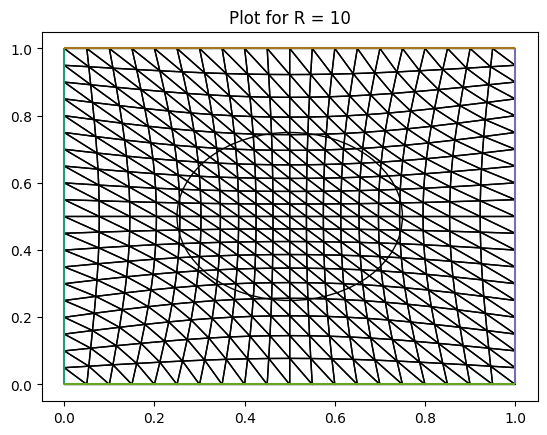



R =  20


  0 SNES Function norm 2.632440101072e-01 
  1 SNES Function norm 3.297875706471e-01 
  2 SNES Function norm 4.080408542819e-02 
  3 SNES Function norm 7.182190659728e-04 
  4 SNES Function norm 1.555229029355e-07 




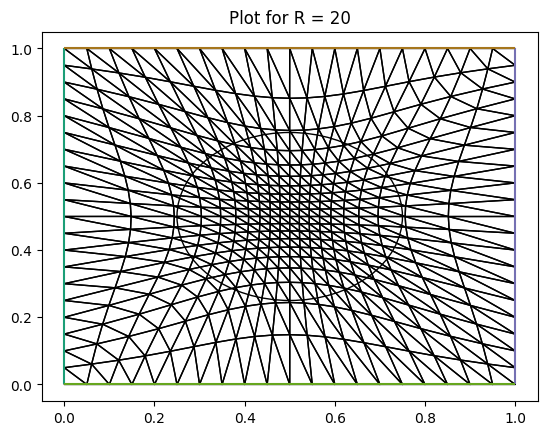



R =  30


  0 SNES Function norm 3.978631853909e-01 
  1 SNES Function norm 3.290761049688e+00 
  2 SNES Function norm 5.618260180247e-01 
  3 SNES Function norm 8.783974082319e-02 
  4 SNES Function norm 2.552356441891e-03 
  5 SNES Function norm 1.581051002784e-06 




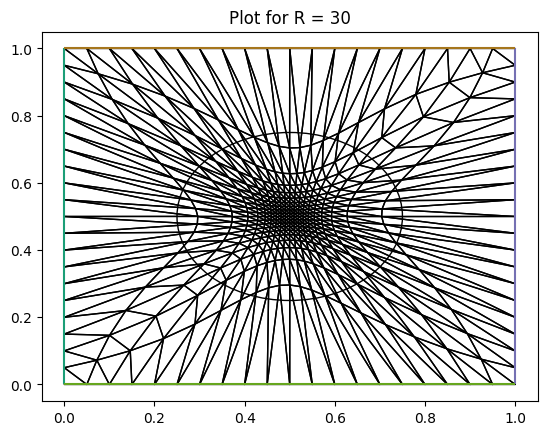



R =  40


  0 SNES Function norm 7.350351535880e-01 
  1 SNES Function norm 1.169259742621e+01 
  2 SNES Function norm 7.129381132986e+00 
  3 SNES Function norm 3.647393154267e+01 
  4 SNES Function norm 1.003347907483e+03 
  5 SNES Function norm 2.054842783039e+01 
  6 SNES Function norm 4.873315740251e+01 
  7 SNES Function norm 5.852695341586e+01 
  8 SNES Function norm 4.889336390838e+01 
  9 SNES Function norm 2.017376762198e+02 
 10 SNES Function norm 8.762405308706e+01 


ConvergenceError: ignored

In [ ]:

# set the mesh

mesh = UnitSquareMesh(20, 20)

# set the function space - a vector function space

V = VectorFunctionSpace(mesh, "CG", 1)


# Access the Mesh Coordinates

xi, eta = SpatialCoordinate(mesh) # mesh is \xi and \eta



# set the test and and trial functions

u  = Function(V)
v = TestFunction(V)


# Define M


M = 1 + exp(R * ((1/4)**2 - ( (u[0] - 1/2)**2 + (u[1] - 1/2)**2) ))


# define the nonlinear problem

F = ( (M) * (inner( grad(u), grad(v) ) ) ) * dx



# define the BC's
# two are given for each side - one for u[0] and one for u[1]


bc1 =  DirichletBC(V, as_vector([Constant(0), eta]), 1)
bc2 = DirichletBC(V, as_vector([Constant(1), eta]), 2)
bc3 = DirichletBC(V, as_vector([xi, Constant(0)]), 3)
bc4 = DirichletBC(V, as_vector([xi, Constant(1)]), 4)


bcs = [ bc1, bc2, bc3, bc4]


# Set the Newton solver and it's output

NewtonLU = {
    "mat_type": "aij",
    "snes_type": "newtonls",
    "snes_monitor": None,
    "snes_stol": 0,
    "snes_atol": 2.0e-5,
    "snes_rtol": 1.0e-5,
    "snes_max_it": 10,
    "ksp_type": "preonly",
    #"ksp_monitor": None,
    "pc_type": "lu",
    "pc_factor_mat_solver_type": "mumps",
}

# solve the problem

problem = NonlinearVariationalProblem(F, u, bcs = bcs)
solver = NonlinearVariationalSolver(problem, solver_parameters = NewtonLU)


# continuation loop for R

import matplotlib.pyplot as plt

R_vals = np.arange(10,101,10)
for val in R_vals:

  print('R = ', val)
  print()
  print()


  R.assign(val)
  solver.solve()

  print()
  print()

  # plot the result

  mesh.coordinates.dat.data[:] = u.dat.data[:]
  fig, axes = plt.subplots()
  triplot(mesh, axes=axes)
  drawing_circle = plt.Circle((0.5, 0.5), 1/4, fill = False)
  plt.title("Plot for R = " + str(val))
  axes.add_patch(drawing_circle)

  plt.show()

  print()
  print()





In [ ]:
import matplotlib.pyplot as plt

mesh.coordinates.dat.data[:] = u.dat.data[:]
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
drawing_circle = plt.Circle((0.5, 0.5), 1/4, fill = False)

axes.add_patch(drawing_circle)